# Random Forest (2)

Name: SAI AKHIL SN | Batch date: 27 Jan 2021

#### Business Problem:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
data=pd.read_csv('C://Users/oftog/Downloads/Fraud_check.csv')

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df=data.copy()

In [9]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [11]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

C:\Users\Public\anacon\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [14]:
df.drop(['Taxable.Income'],axis=1,inplace=True)

In [15]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [16]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])

In [17]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing



In [31]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])

In [32]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


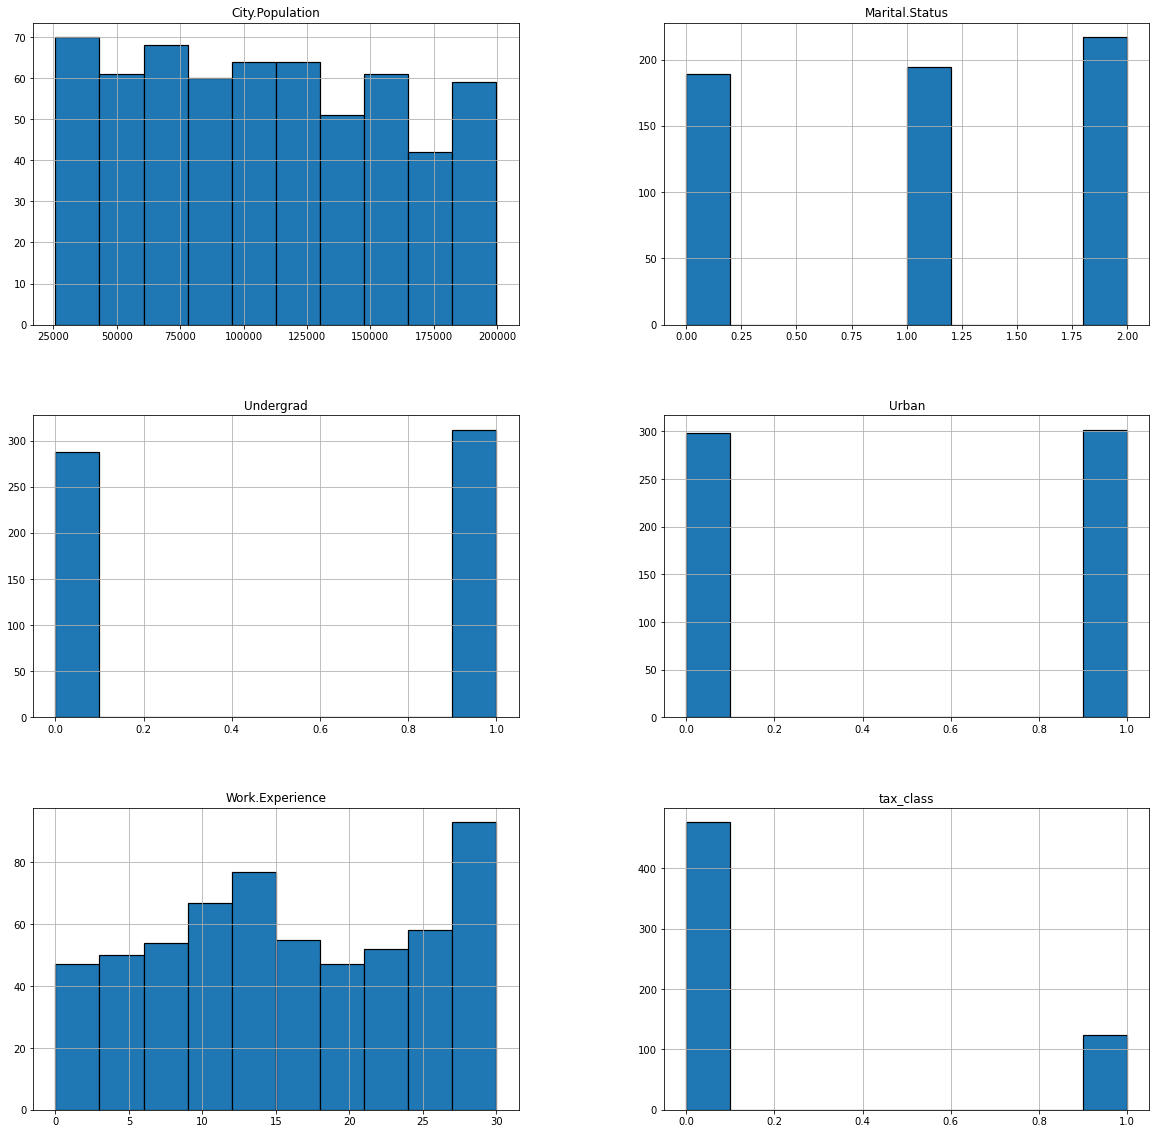

In [20]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [33]:
df.to_csv('auto.csv')

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (600, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

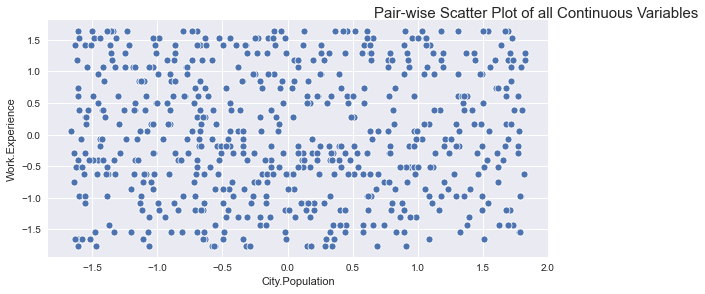

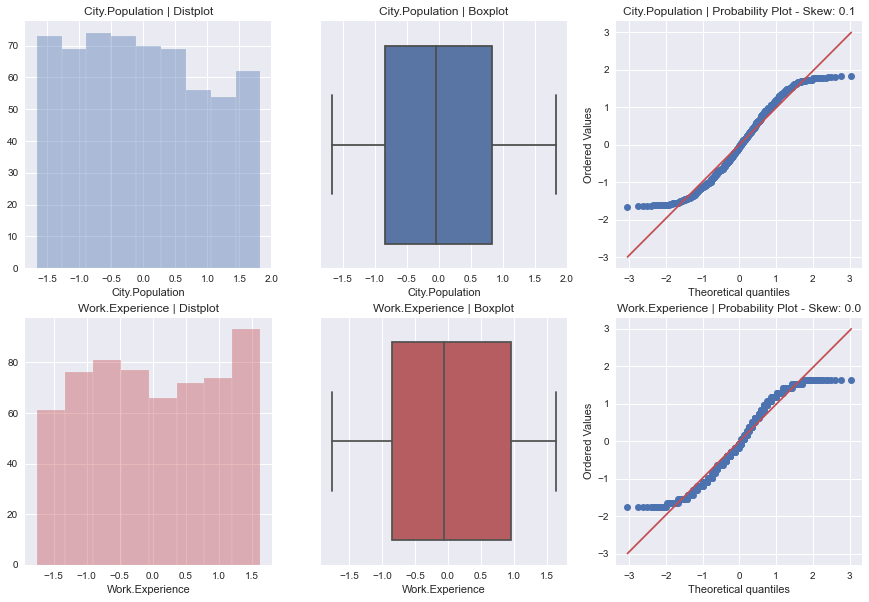

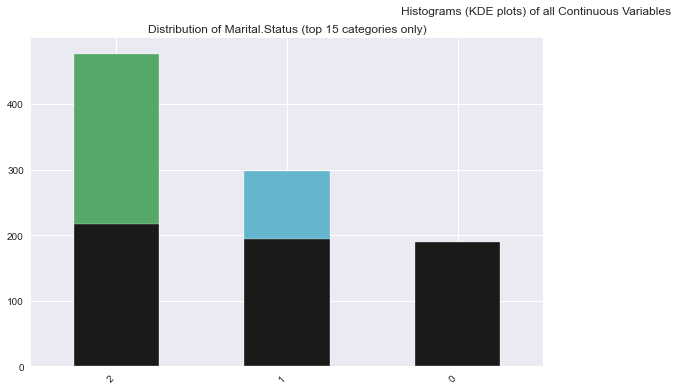

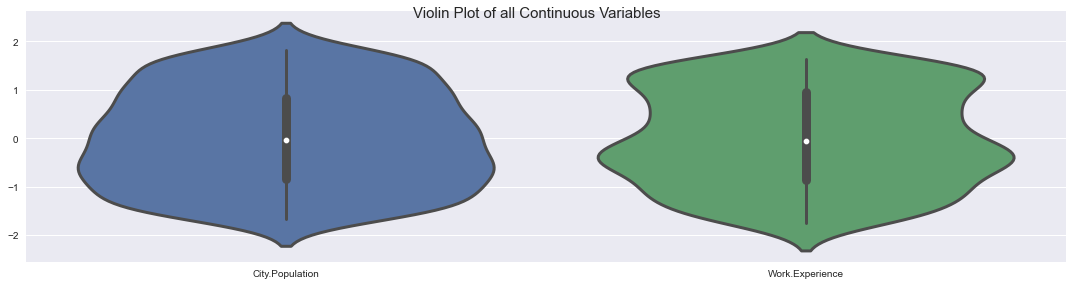

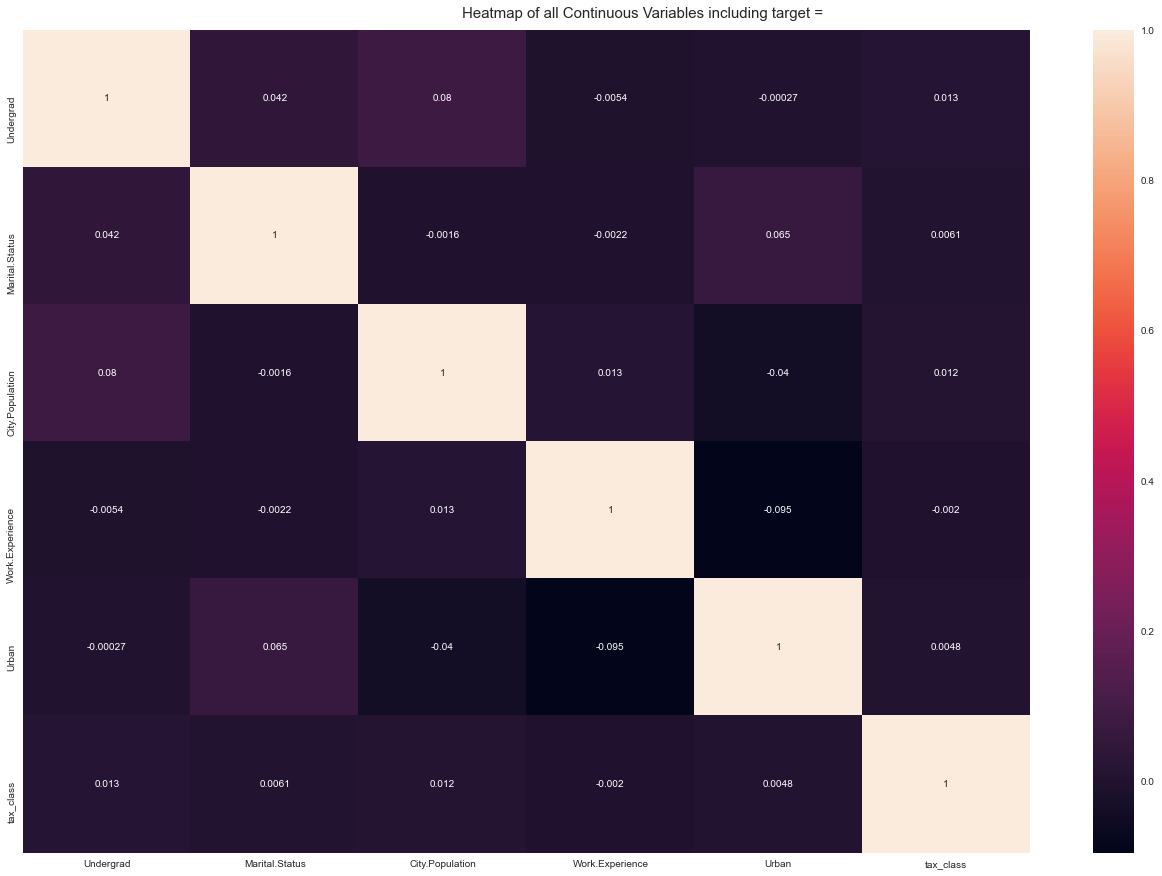

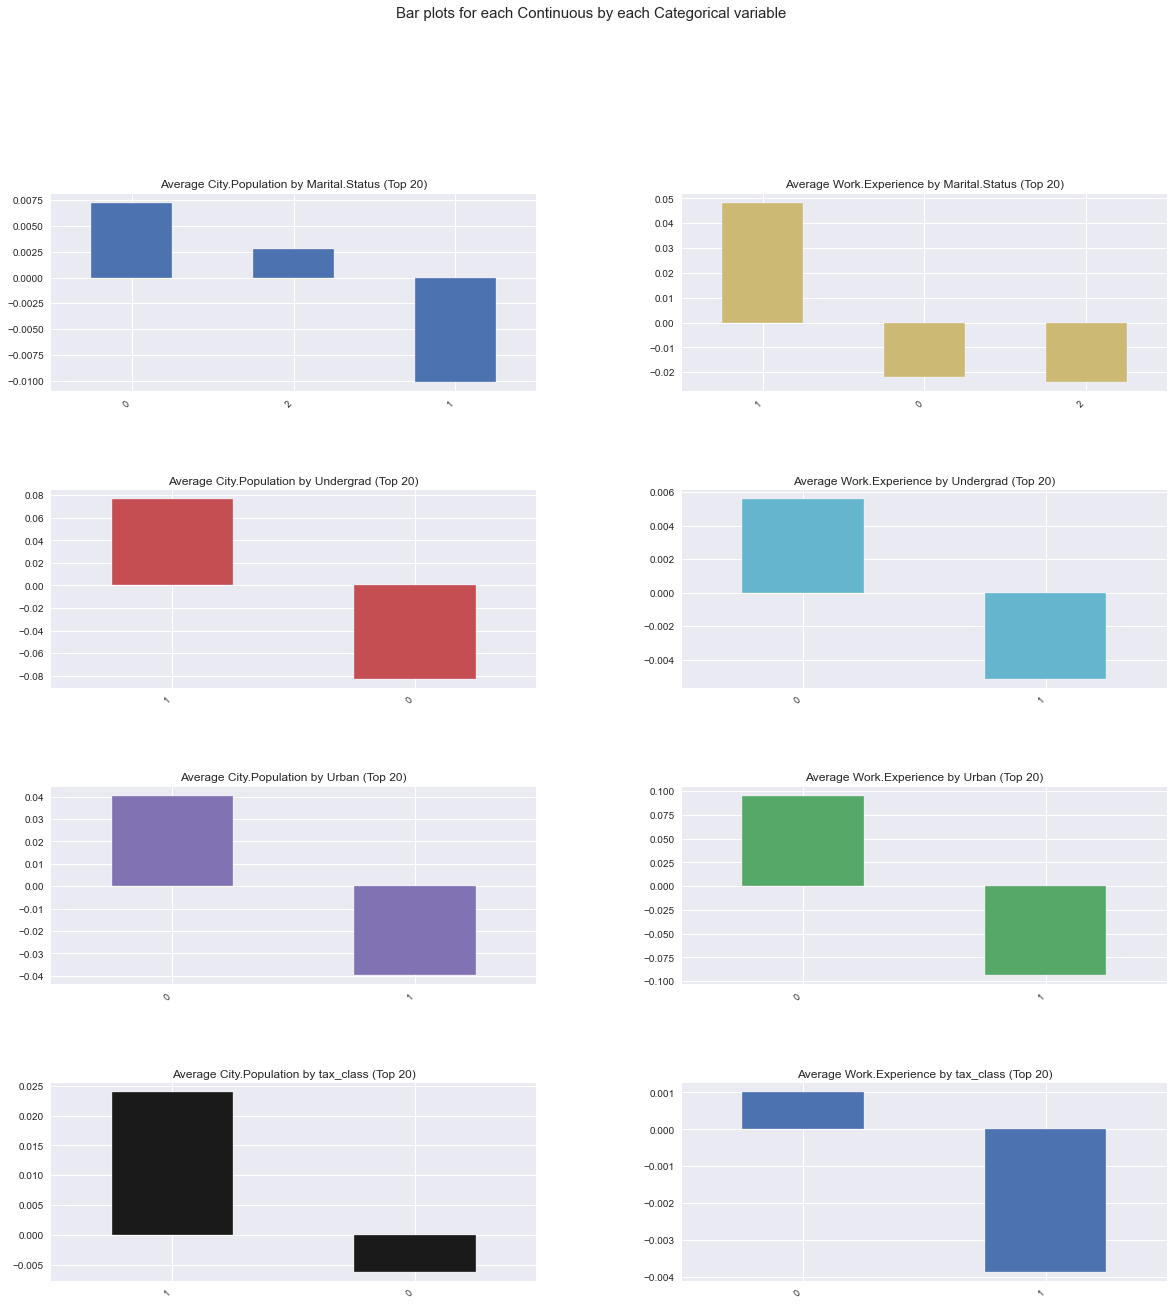

Time to run AutoViz (in seconds) = 3.547

 ###################### VISUALIZATION Completed ########################


In [34]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()


viz=AV.AutoViz('auto.csv')

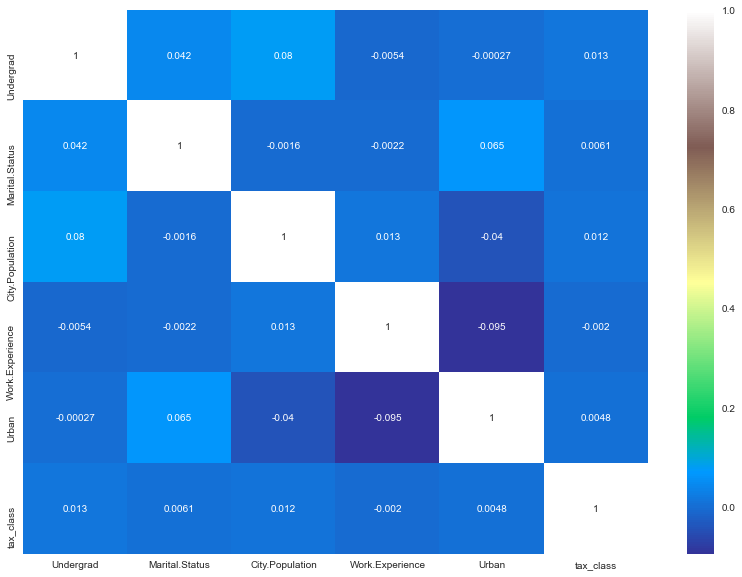

In [35]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [36]:
pdata=df.copy()

In [37]:
pdata.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0


In [38]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']

In [39]:
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

### Model building using Random forest

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier 

In [42]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.7416666666666667


### Using grid search optimisation

from sklearn.model_selection import GridSearchCV
gmodel=RandomForestClassifier()
param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)})
grid=GridSearchCV(gmodel,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

In [46]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.795


In [47]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.7979166666666667


### Applying K-Fold cross Validation

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


### Bagging

In [49]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [50]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


### Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7549999999999999


### Voting classifier

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [53]:
print(results.mean())

0.7933333333333332


### XGBM 

In [54]:
from tqdm.notebook import tqdm, trange
import time
# First XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]


In [57]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [58]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.83%


In [59]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


### LGBM

In [60]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [61]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [62]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 98, number of negative: 382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204167 -> initscore=-1.360453
[LightGBM] [Info] Start training from score -1.360453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [63]:
#Prediction
y_pred=clf.predict(x_test)

In [64]:
predictions = [round(value) for value in y_pred]

In [65]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7833333333333333